In [32]:
import matplotlib 
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

In [33]:
countries_path = r'C:\Users\Nazeef\countries.csv'

In [34]:
df = pd.read_csv(countries_path, sep = r'\s*,\s*', engine = 'python')

In [35]:
df

,country,city,longitude,latitude
0,United Kingdom,UoB,-1.9305,52.4508
1,United Kingdom,UoW,-1.5615,52.3793
2,United Kingdom,Home,-1.9709,52.4721
3,Sweden,Location,11.9778,57.7236


In [36]:
df_geo = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))

In [37]:
df_geo

,country,city,longitude,latitude,geometry
0,United Kingdom,UoB,-1.9305,52.4508,POINT (-1.93050 52.45080)
1,United Kingdom,UoW,-1.5615,52.3793,POINT (-1.56150 52.37930)
2,United Kingdom,Home,-1.9709,52.4721,POINT (-1.97090 52.47210)
3,Sweden,Location,11.9778,57.7236,POINT (11.97780 57.72360)


In [38]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Nazeef\AppData\Local\Temp\ipykernel_17996\3432786234.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



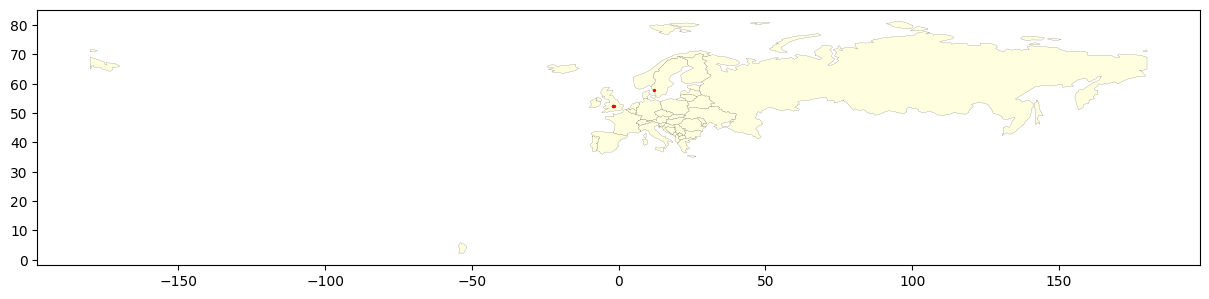

In [39]:
axis = world_data[world_data.continent == 'Europe'].plot(
    color = 'lightyellow', edgecolor = 'black', linewidth=0.1)

df_geo.plot(ax = axis, color = 'red', markersize=2)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15,6)
fig.savefig('matplot.png', dpi = 200)
plt.show()

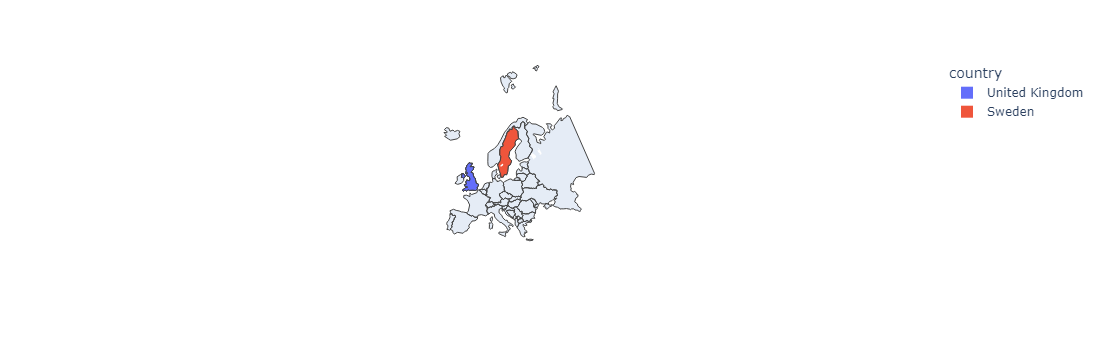

In [40]:
f = px.choropleth(df, 
                  locationmode = 'country names', 
                  locations = df['country'], 
                  scope = 'europe', 
                  color = df['country'])
f.show()